# Робота №1
### Імітаційне моделювання в теорії надійності. Початковий аналіз вибірки.
Роботу виконала
Бригада №1
у складі: Панчук Ігор(ком.), Шеметов Ярослав та Попович Марія.

#### Імпорт необхідних бібліотек

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### 1. Введення даних

In [4]:
df = pd.read_csv('IDL.csv')

# Filter rows where the DCOUNTRY column contains 'AUT'
df_filtered = df[df['DCOUNTRY'] == 'AUT']

# Select the column 'DAYS AFTER 105'
X = df_filtered['DAYS AFTER 105']

# Display the filtered result
print(X)

0      548
1      102
2      184
3       51
4       82
      ... 
262    212
263    294
264    164
265     17
266    136
Name: DAYS AFTER 105, Length: 266, dtype: int64


### 2. Моделювання вибірок

In [5]:
rand_exp = np.random.exponential(scale=1, size=100)

In [6]:
rand_norm = np.random.normal(loc=0, scale=2, size=1000)

In [7]:
rand_extrem = stats.genextreme.rvs(c=1, loc=0, scale=1, size=10000)

### 3. Основні числові характеристики вибірки

In [8]:
# Mean, standard deviation, variance
mean = np.mean(X)
std = np.std(X)
variance = np.var(X)

# Median and mode
median = np.median(X)
mode_result = stats.mode(X, keepdims=True)
mode = mode_result.mode[0]

# Min and max
min_val = np.min(X)
max_val = np.max(X)

# Skewness and Kurtosis
skewness = stats.skew(X)
kurtosis = stats.kurtosis(X)

print(f"Mean: {mean}\nMedian: {median}\nMode: {mode}")
print(f"Std: {std}\nVariance: {variance}\nMin: {min_val}\nMax: {max_val}")
print(f"Skewness: {skewness}\nKurtosis: {kurtosis}")

Mean: 510.109022556391
Median: 345.0
Mode: 4
Std: 472.9342808242429
Variance: 223666.83397874385
Min: 4
Max: 2244
Skewness: 1.3197121928507172
Kurtosis: 1.398350200941958


### 4. Побудова довірчих інтервалів для Mξ та σξ

In [9]:
# Confidence interval for the mean
confidence_level = 0.95
n = len(X)
mean_conf_interval = stats.t.interval(confidence_level, n-1, loc=np.mean(X), scale=stats.sem(X))

# Confidence interval for the standard deviation
std_conf_interval = (np.std(X) - 1.96*np.std(X)/np.sqrt(n), np.std(X) + 1.96*np.std(X)/np.sqrt(n))

print(f"Mean confidence interval: {mean_conf_interval}")
print(f"Standard deviation confidence interval: {std_conf_interval}")

Mean confidence interval: (np.float64(452.9066645976236), np.float64(567.3113805151584))
Standard deviation confidence interval: (np.float64(416.09925676162567), np.float64(529.7693048868601))


### 5. Перевірити гіпотези H1={Mξ=110}, H2={med=110}

In [10]:
# Hypothesis test for mean
t_stat, p_value_mean = stats.ttest_1samp(X, 110)

# Hypothesis test for median (non-parametric)
p_value_median = stats.wilcoxon(X - 110)[1]

print(f"H1 test p-value: {p_value_mean}")
print(f"H2 test p-value: {p_value_median}")

H1 test p-value: 6.496831258196394e-33
H2 test p-value: 1.0576318945921128e-34


### 6. Провести групування вибіркових даних , вибираючи число інтервалов групування К = 10 –12 та побудувати таблицю групування-частоти

In [11]:
num_bins = 10
freq, bins = np.histogram(X, bins=num_bins)

# Create a frequency table
print("Bins:", bins)
print("Frequencies:", freq)

Bins: [   4.  228.  452.  676.  900. 1124. 1348. 1572. 1796. 2020. 2244.]
Frequencies: [95 65 30 22 22 13 10  3  3  3]


### 7. Представити дані в графічному вигляді : гістограмa, полігон, normal probability plot

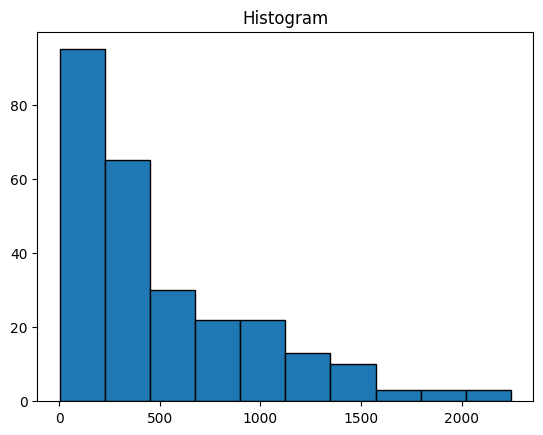

In [12]:
import matplotlib.pyplot as plt

plt.hist(X, bins=10, edgecolor='black')
plt.title('Histogram')
plt.show()

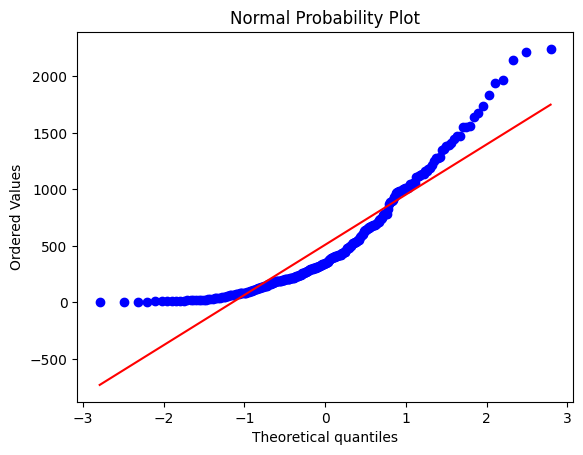

In [13]:
stats.probplot(X, dist="norm", plot=plt)
plt.title('Normal Probability Plot')
plt.show()